In [37]:
import random
import pandas as pd
import numpy as np 
from tabulate import tabulate
from statistics import mean

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

# 1) Experimentando Diferentes conjuntos de dados

## 1.1) Pré-processamento

In [38]:
def config_ravel(y_train, y_test):
    y_train_ravel = y_train.values.ravel()
    y_test_ravel = y_test.values.ravel()  

    return y_train_ravel, y_test_ravel

## 1.2) Carregar os dados de treinamento e teste

In [39]:
X_train_array = []
y_train_array = []
X_test_array = []
y_test_array = []  

def get_data_from_conjunto(conjunto: int):      

    X_train = pd.read_csv(f'../Dados/ModelosSimples/Conjunto_{conjunto+1}/X_train.csv')
    y_train = pd.read_csv(f'../Dados/ModelosSimples/Conjunto_{conjunto+1}/y_train.csv')
    X_test = pd.read_csv(f'../Dados/ModelosSimples/Conjunto_{conjunto+1}/X_test.csv')
    y_test = pd.read_csv(f'../Dados/ModelosSimples/Conjunto_{conjunto+1}/y_test.csv')

    num_classes = len(np.unique(y_train))
    input = X_train.shape[1]
    
    y_train, y_test = config_ravel(y_train, y_test)

    X_train_array.append(X_train)
    y_train_array.append(y_train)
    X_test_array.append(X_test)
    y_test_array.append(y_test)

    return num_classes, input, X_train_array, y_train_array, X_test_array, y_test_array

## 1.3) Montando rede

In [40]:
def train_naive_bayes(X_train, y_train):

    naive_bayes = GaussianNB(var_smoothing=1e-9, priors=[0.4, 0.3, 0.3])

    cv_scores = cross_val_score(naive_bayes, X_train, y_train, cv=5, scoring='accuracy')
    f1_per_fold = cross_val_score(naive_bayes, X_train, y_train, cv=5, scoring='f1_weighted')
    recall_per_fold = cross_val_score(naive_bayes, X_train, y_train, cv=5, scoring='recall_weighted')
    precision_per_fold = cross_val_score(naive_bayes, X_train, y_train, cv=5, scoring='precision_weighted')

    naive_bayes.fit(X_train, y_train)

    # Calculando métricas para cada fold
    accuracy_mean = mean(cv_scores)
    f1_mean = mean(f1_per_fold)
    recall_mean = mean(recall_per_fold)
    precision_mean = mean(precision_per_fold)

    return accuracy_mean, f1_mean, recall_mean, precision_mean, naive_bayes

## 1.4) Carregando dados e treinando (Cross validation)

In [41]:
conjuntos = 10
resultados_acuracia = []
resultados_precisao = []
resultados_revocacao = []
resultados_f1 = []
best_models = []

for i in range(conjuntos):
    print(f'\nConjunto {i + 1}')
    num_classes, input, X_train_array, y_train_array, X_test_array, y_test_array = get_data_from_conjunto(i)

    media_accuracy, media_f1, media_recall, media_precision, model = train_naive_bayes(X_train_array[i], y_train_array[i])

    print(f'Acurácia: {media_accuracy}')
    print(f'F1: {media_f1}')
    print(f'Revocação: {media_recall}')
    print(f'Precisão: {media_precision}')

    resultados_acuracia.append(media_accuracy)
    resultados_precisao.append(media_precision)
    resultados_revocacao.append(media_recall)
    resultados_f1.append(media_f1)
    best_models.append(model)


Conjunto 1
Acurácia: 0.95
F1: 0.9520671004706516
Revocação: 0.95
Precisão: 0.9599724944068895

Conjunto 2
Acurácia: 0.9585714285714286
F1: 0.9598111797181665
Revocação: 0.9585714285714286
Precisão: 0.96373222274301

Conjunto 3
Acurácia: 0.9585714285714285
F1: 0.9599363070217611
Revocação: 0.9585714285714285
Precisão: 0.964978578858932

Conjunto 4
Acurácia: 0.94
F1: 0.9418890097222983
Revocação: 0.94
Precisão: 0.949362606709849

Conjunto 5
Acurácia: 0.9357142857142857
F1: 0.9385226835133995
Revocação: 0.9357142857142857
Precisão: 0.9470267135978342

Conjunto 6
Acurácia: 0.9414285714285714
F1: 0.9448333189058365
Revocação: 0.9414285714285714
Precisão: 0.9566386900676537

Conjunto 7
Acurácia: 0.9442857142857143
F1: 0.9460428213531485
Revocação: 0.9442857142857143
Precisão: 0.9522731653272886

Conjunto 8
Acurácia: 0.9514285714285714
F1: 0.9526480705982011
Revocação: 0.9514285714285714
Precisão: 0.9561614923316349

Conjunto 9
Acurácia: 0.95
F1: 0.951216994856633
Revocação: 0.95
Precisão: 0

In [42]:
# Criar um DataFrame com os resultados
resultados_acuracia_percent = [f"{acuracia * 100:.2f}%" for acuracia in resultados_acuracia]
resultados_precisao_percent = [f"{precisao * 100:.2f}%" for precisao in resultados_precisao]
resultados_revocacao_percent = [f"{revocacao * 100:.2f}%" for revocacao in resultados_revocacao]
resultados_f1_percent = [f"{f1 * 100:.2f}%" for f1 in resultados_f1]

# Criar um DataFrame com os resultados
data = {
    'Conjunto': [f'Conjunto {i+1}' for i in range(conjuntos)],
    'Acurácia': resultados_acuracia_percent,
    'Precisão': resultados_precisao_percent,
    'Revocação': resultados_revocacao_percent,
    'F1': resultados_f1_percent
}

df_resultados = pd.DataFrame(data)

print("# Resultados Médios do treinamento em 10 Conjuntos de Dados\n")
print(df_resultados.to_markdown(index=False))

# Resultados Médios do treinamento em 10 Conjuntos de Dados

| Conjunto    | Acurácia   | Precisão   | Revocação   | F1     |
|:------------|:-----------|:-----------|:------------|:-------|
| Conjunto 1  | 95.00%     | 96.00%     | 95.00%      | 95.21% |
| Conjunto 2  | 95.86%     | 96.37%     | 95.86%      | 95.98% |
| Conjunto 3  | 95.86%     | 96.50%     | 95.86%      | 95.99% |
| Conjunto 4  | 94.00%     | 94.94%     | 94.00%      | 94.19% |
| Conjunto 5  | 93.57%     | 94.70%     | 93.57%      | 93.85% |
| Conjunto 6  | 94.14%     | 95.66%     | 94.14%      | 94.48% |
| Conjunto 7  | 94.43%     | 95.23%     | 94.43%      | 94.60% |
| Conjunto 8  | 95.14%     | 95.62%     | 95.14%      | 95.26% |
| Conjunto 9  | 95.00%     | 95.62%     | 95.00%      | 95.12% |
| Conjunto 10 | 95.57%     | 96.06%     | 95.57%      | 95.69% |


## 1.5) Analisando resultados gerais

In [43]:
# Calculate the overall mean
overall_mean_acuracia = sum(resultados_acuracia) / len(resultados_acuracia)
overall_mean_precisao = sum(resultados_precisao) / len(resultados_precisao)
overall_mean_revocacao = sum(resultados_revocacao) / len(resultados_revocacao)
overall_mean_f1 = sum(resultados_f1) / len(resultados_f1)

# Create a DataFrame
data = {
    'Acurácia': [overall_mean_acuracia],
    'Precisão': [overall_mean_precisao],
    'Revocação': [overall_mean_revocacao],
    'F1-Score': [overall_mean_f1]
}

df = pd.DataFrame(data)

# Display the table
print(df)

   Acurácia  Precisão  Revocação  F1-Score
0  0.948571  0.956702   0.948571  0.950382


## 1.6) Matriz de confusao e resultados da predição

----------------------------------------------------------------
Eficácia do conjunto 1


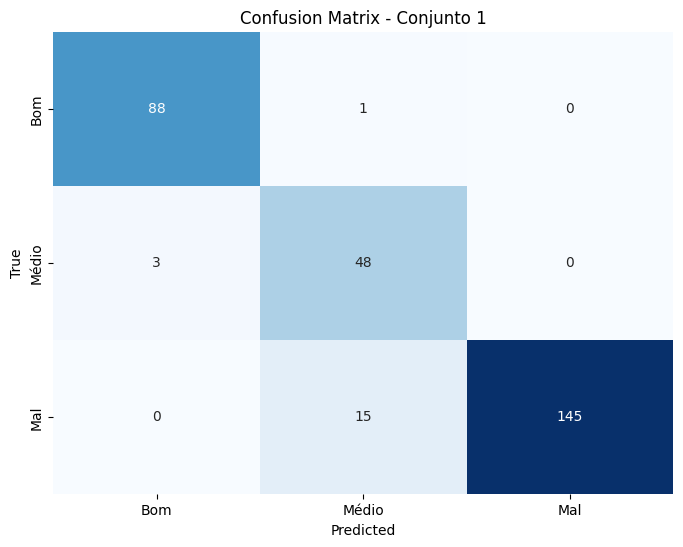

Acurácia no conjunto de teste: 93.67%

Precisão no conjunto de teste: 94.77%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bom       0.97      0.99      0.98        89
       Medio       0.75      0.94      0.83        51
        Ruim       1.00      0.91      0.95       160

    accuracy                           0.94       300
   macro avg       0.91      0.95      0.92       300
weighted avg       0.95      0.94      0.94       300


----------------------------------------------------------------

Eficácia do conjunto 2


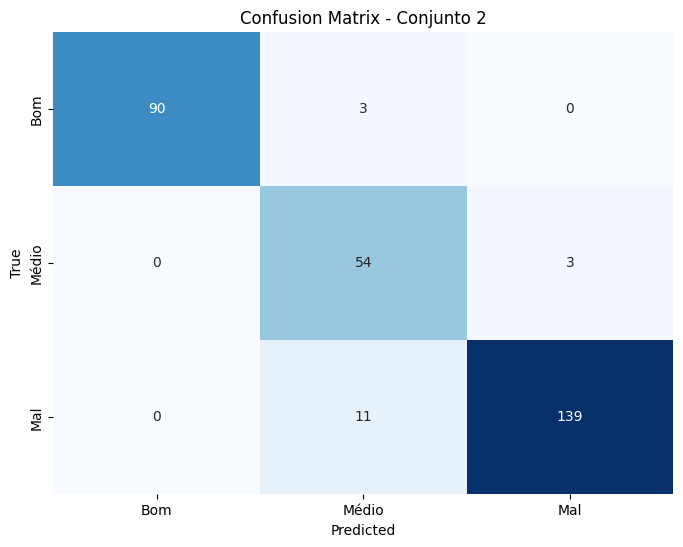

Acurácia no conjunto de teste: 94.33%

Precisão no conjunto de teste: 95.03%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bom       1.00      0.97      0.98        93
       Medio       0.79      0.95      0.86        57
        Ruim       0.98      0.93      0.95       150

    accuracy                           0.94       300
   macro avg       0.92      0.95      0.93       300
weighted avg       0.95      0.94      0.95       300


----------------------------------------------------------------

Eficácia do conjunto 3


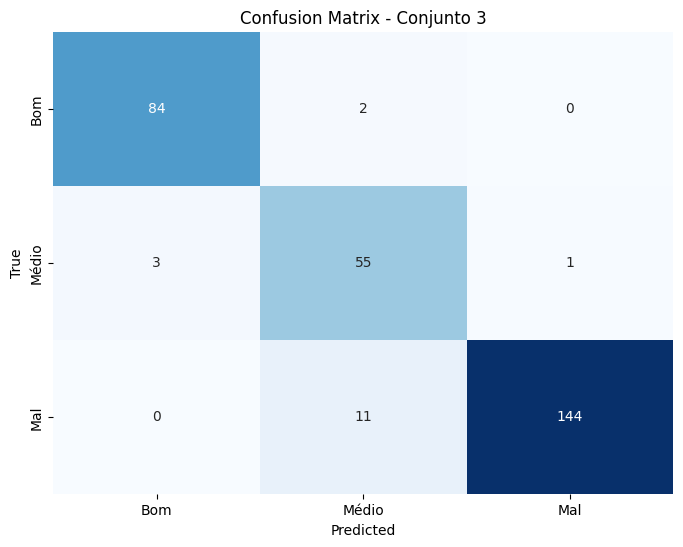

Acurácia no conjunto de teste: 94.33%

Precisão no conjunto de teste: 94.90%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bom       0.97      0.98      0.97        86
       Medio       0.81      0.93      0.87        59
        Ruim       0.99      0.93      0.96       155

    accuracy                           0.94       300
   macro avg       0.92      0.95      0.93       300
weighted avg       0.95      0.94      0.94       300


----------------------------------------------------------------

Eficácia do conjunto 4


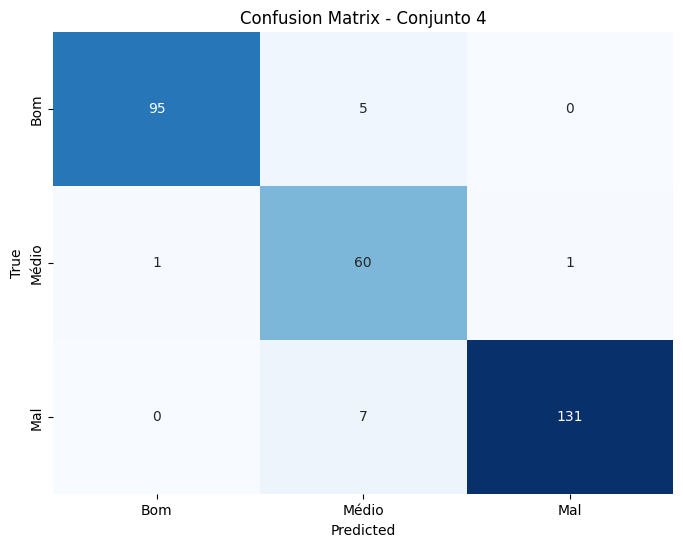

Acurácia no conjunto de teste: 95.33%

Precisão no conjunto de teste: 95.86%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bom       0.99      0.95      0.97       100
       Medio       0.83      0.97      0.90        62
        Ruim       0.99      0.95      0.97       138

    accuracy                           0.95       300
   macro avg       0.94      0.96      0.95       300
weighted avg       0.96      0.95      0.95       300


----------------------------------------------------------------

Eficácia do conjunto 5


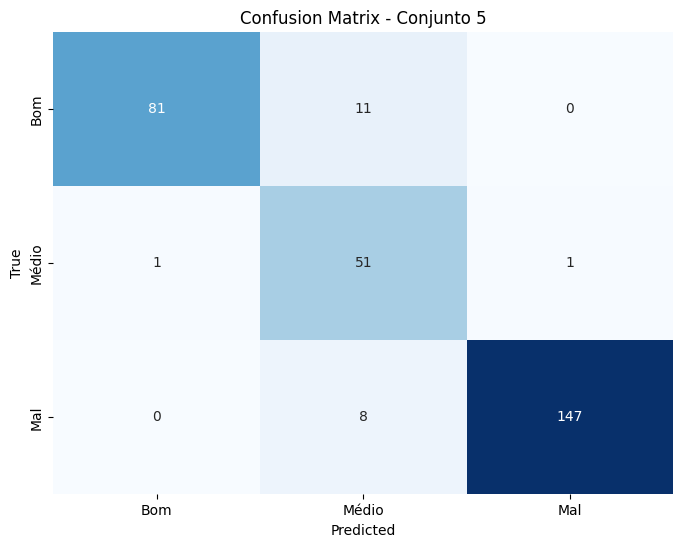

Acurácia no conjunto de teste: 93.00%

Precisão no conjunto de teste: 94.48%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bom       0.99      0.88      0.93        92
       Medio       0.73      0.96      0.83        53
        Ruim       0.99      0.95      0.97       155

    accuracy                           0.93       300
   macro avg       0.90      0.93      0.91       300
weighted avg       0.94      0.93      0.93       300


----------------------------------------------------------------

Eficácia do conjunto 6


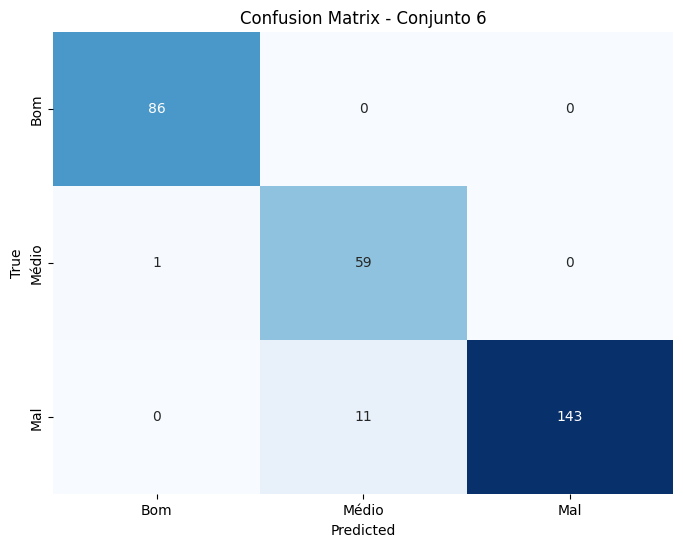

Acurácia no conjunto de teste: 96.00%

Precisão no conjunto de teste: 96.53%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bom       0.99      1.00      0.99        86
       Medio       0.84      0.98      0.91        60
        Ruim       1.00      0.93      0.96       154

    accuracy                           0.96       300
   macro avg       0.94      0.97      0.95       300
weighted avg       0.97      0.96      0.96       300


----------------------------------------------------------------

Eficácia do conjunto 7


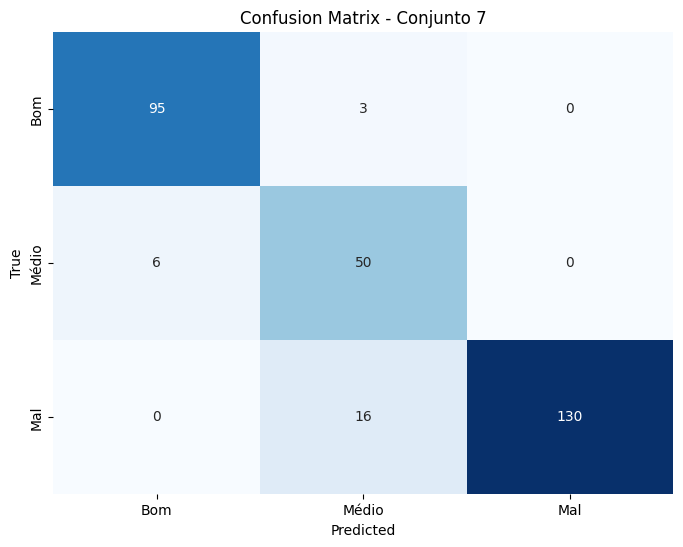

Acurácia no conjunto de teste: 91.67%

Precisão no conjunto de teste: 92.92%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bom       0.94      0.97      0.95        98
       Medio       0.72      0.89      0.80        56
        Ruim       1.00      0.89      0.94       146

    accuracy                           0.92       300
   macro avg       0.89      0.92      0.90       300
weighted avg       0.93      0.92      0.92       300


----------------------------------------------------------------

Eficácia do conjunto 8


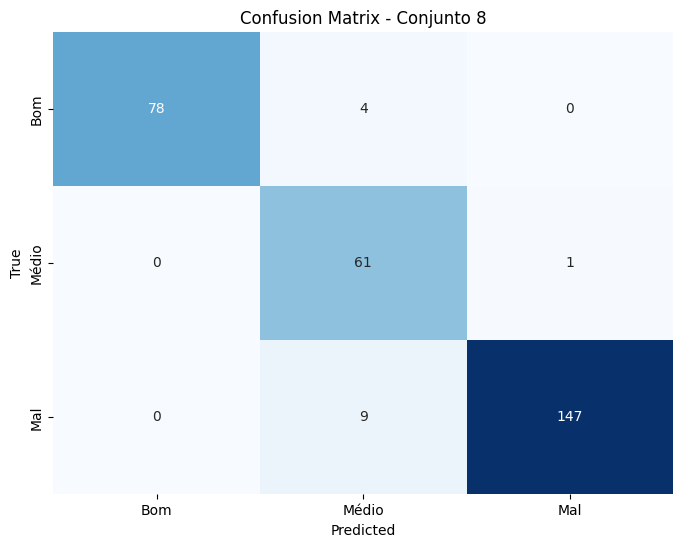

Acurácia no conjunto de teste: 95.33%

Precisão no conjunto de teste: 96.02%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bom       1.00      0.95      0.97        82
       Medio       0.82      0.98      0.90        62
        Ruim       0.99      0.94      0.97       156

    accuracy                           0.95       300
   macro avg       0.94      0.96      0.95       300
weighted avg       0.96      0.95      0.95       300


----------------------------------------------------------------

Eficácia do conjunto 9


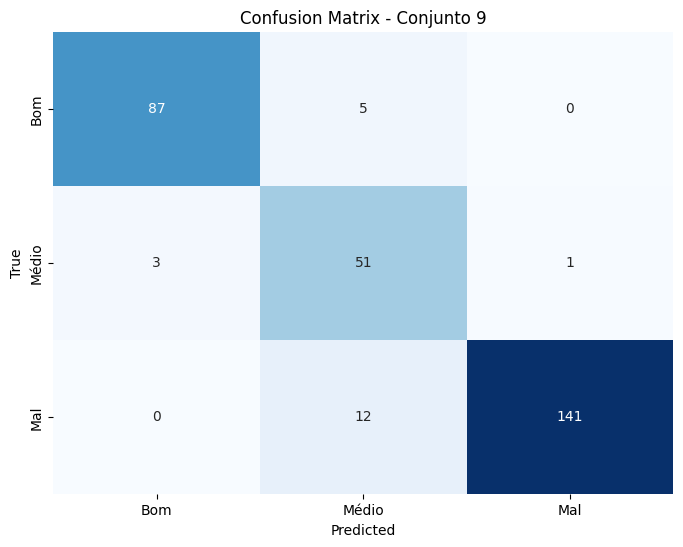

Acurácia no conjunto de teste: 93.00%

Precisão no conjunto de teste: 94.04%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bom       0.97      0.95      0.96        92
       Medio       0.75      0.93      0.83        55
        Ruim       0.99      0.92      0.96       153

    accuracy                           0.93       300
   macro avg       0.90      0.93      0.91       300
weighted avg       0.94      0.93      0.93       300


----------------------------------------------------------------

Eficácia do conjunto 10


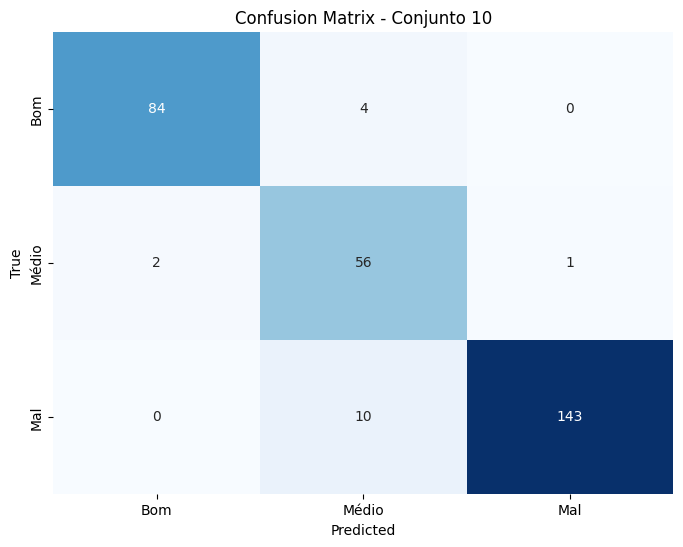

Acurácia no conjunto de teste: 94.33%

Precisão no conjunto de teste: 95.03%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bom       0.98      0.95      0.97        88
       Medio       0.80      0.95      0.87        59
        Ruim       0.99      0.93      0.96       153

    accuracy                           0.94       300
   macro avg       0.92      0.95      0.93       300
weighted avg       0.95      0.94      0.95       300


----------------------------------------------------------------



In [44]:
print("----------------------------------------------------------------")
# List to store average accuracies for each conjunto
average_accuracies = []
average_precisions = []
for i in range(conjuntos):
    print(f'Eficácia do conjunto {i + 1}')
    X_test = X_test_array[i]
    y_test = y_test_array[i]

    # Load the trained model for the current dataset
    naiveBayes = best_models[i]

    # Make predictions on the test set
    y_pred = naiveBayes.predict(X_test)

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Bom', 'Médio', 'Mal'], yticklabels=['Bom', 'Médio', 'Mal'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Conjunto {i + 1}')
    plt.show()

    accuracy = accuracy_score(y_test, y_pred)

    # Append accuracy to the list
    average_accuracies.append(accuracy)
    
    print(f'Acurácia no conjunto de teste: {accuracy * 100:.2f}%\n')

    # Precisao do modelo
    precision = precision_score(y_test, y_pred, average='weighted')

    # Append precisions to the list
    average_precisions.append(precision)

    print(f'Precisão no conjunto de teste: {precision * 100:.2f}%\n')

    # Print classification report
    classification_rep = classification_report(y_test, y_pred)
    print(f'Relatório de Classificação:\n{classification_rep}')
    

    print('\n----------------------------------------------------------------\n')

In [45]:
# Find the index of the conjunto with the highest average accuracy
accuracy_mean = mean(average_accuracies)
precision_mean = mean(average_precisions)

best_conjunto_index = np.argmax(average_accuracies)

# Acuracia media de todos os conjuntos
print(f'Acurácia média de todos os conjuntos: {accuracy_mean * 100:.2f}%')

# Precisao media de todos os conjuntos
print(f'Precisão média de todos os conjuntos: {precision_mean * 100:.2f}%')

# Print the conjunto with the highest average accuracy
print(f"\nO conjunto {best_conjunto_index + 1} obteve os melhores resultados.")


Acurácia média de todos os conjuntos: 94.10%
Precisão média de todos os conjuntos: 94.96%

O conjunto 6 obteve os melhores resultados.


# 2) Experimentando as melhores configurações de parametros

## OBS: Pegando um conjunto aleatorio entre os 10 


In [46]:
conjunto_aleatorio = random.randint(0, 9)

# Print the conjunto with the highest average accuracy
print(f"\nO conjunto {conjunto_aleatorio + 1} será utilizado para o teste de parâmetros")


O conjunto 10 será utilizado para o teste de parâmetros


## 2.1) Carregar os dados de treinamento e teste

In [47]:
# MUDAR ISSO -> ESCOLHER UM NUMERO ENTRE 1 A 10 E PEGAR AQUELE CONJUNTO

X_train = X_train_array[conjunto_aleatorio]
y_train = y_train_array[conjunto_aleatorio]
X_test = X_test_array[conjunto_aleatorio]
y_test = y_test_array[conjunto_aleatorio]


## 2.2) Treinando modelo 

In [48]:
param_grid = {
    'priors': [None, [0.3, 0.4, 0.3], [0.2, 0.6, 0.2], [0.4, 0.3, 0.3]],
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

model = GaussianNB()

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'priors': [None, [0.3, 0.4, 0.3], [0.2, 0.6, 0.2],
                                    [0.4, 0.3, 0.3]],
                         'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]},
             return_train_score=True, scoring='accuracy')

## 2.3) Analisando todas combinações

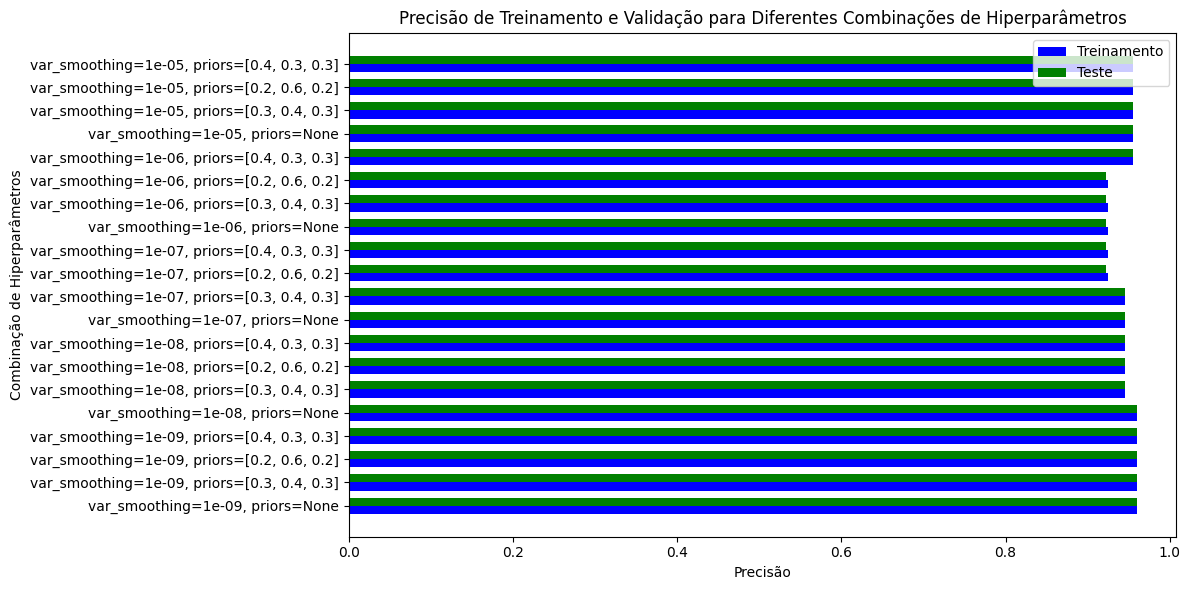

In [49]:
results = grid_search.cv_results_

param_combinations = [f'var_smoothing={var_smoothing}, priors={priors}' 
                      for var_smoothing in param_grid['var_smoothing'] 
                      for priors in param_grid['priors']]

train_scores = results['mean_train_score']

validations_scores = results['mean_test_score']

y_indices = np.arange(len(param_combinations))

bar_height = 0.35

plt.figure(figsize=(12, 6))
plt.barh(y_indices, train_scores, height=bar_height, label='Treinamento', color='b', align='center')
plt.barh(y_indices + bar_height, validations_scores, height=bar_height, label='Teste', color='g', align='center')

plt.ylabel('Combinação de Hiperparâmetros')
plt.xlabel('Precisão')
plt.title('Precisão de Treinamento e Validação para Diferentes Combinações de Hiperparâmetros')
plt.yticks(y_indices + bar_height / 2, param_combinations)
plt.legend()
plt.tight_layout()

plt.show()

## 2.4) Analisando Cada combinação para var_smoothing

In [50]:

# # Extrair os resultados do GridSearchCV
# results = grid_search.cv_results_

# # Valores únicos de var_smoothing
# var_smoothing_values = param_grid['var_smoothing']

# # Precisões obtidas no treinamento (média de validação cruzada)
# train_scores = results['mean_train_score']

# # Precisões obtidas no teste (média de validação cruzada)
# test_scores = results['mean_test_score']

# # Número de combinações de hiperparâmetros
# n_combinations = len(param_grid['priors']) * len(var_smoothing_values)

# # Largura das barras
# bar_width = 0.35

# # Loop para criar gráficos separados para cada var_smoothing
# for i, var_smoothing in enumerate(var_smoothing_values):
#     plt.figure(figsize=(12, 6))
    
#     # Índices para o eixo x
#     x_indices = np.arange(len(param_grid['priors']))
    
#     # Precisões correspondentes de treinamento e teste para este var_smoothing
#     train_scores_var_smoothing = train_scores[i::n_combinations]
#     test_scores_var_smoothing = test_scores[i::n_combinations]
    
#     # Rótulos para as combinações de hiperparâmetros
#     labels = [f'priors={priors}' for priors in param_grid['priors']]
    
#     plt.bar(x_indices, train_scores_var_smoothing, width=bar_width, label='Treinamento', color='b', align='center')
#     plt.bar(x_indices + bar_width, test_scores_var_smoothing, width=bar_width, label='Teste', color='g', align='center')
    
#     plt.xlabel('Combinação de Hiperparâmetros')
#     plt.ylabel('Precisão')
#     plt.title(f'Precisão de Treinamento e Teste para var_smoothing={var_smoothing}')
#     plt.xticks(x_indices + bar_width / 2, labels, rotation=45)
#     plt.legend()
#     plt.tight_layout()

#     plt.show()

### 2.5) Tabela comparativa para todas combinações

In [51]:
results = grid_search.cv_results_
param_combinations = [f'{params}' for params in grid_search.cv_results_['params']]
train_scores = results['mean_train_score']
test_scores = results['mean_test_score']

table_data = []

for i in range(len(param_combinations)):
    row = [i+1, param_combinations[i], train_scores[i], test_scores[i]]
    table_data.append(row)

table = tabulate(table_data, headers=['Combinação', 'Hiperparâmetros', 'Train Score', 'Validation Score'], tablefmt='fancy_grid', numalign='left')

print(table)

# # Crie um DataFrame a partir dos dados da tabela
# df = pd.DataFrame(table_data, columns=['Combinação', 'Hiperparâmetros', 'Train Score', 'Validation Score'])

# # Salve o DataFrame em um arquivo CSV
# df.to_csv('resultados.csv', index=False)  # Isso salvará os dados em um arquivo CSV chamado 'resultados.csv'

╒══════════════╤═════════════════════════════════════════════════════╤═══════════════╤════════════════════╕
│ Combinação   │ Hiperparâmetros                                     │ Train Score   │ Validation Score   │
╞══════════════╪═════════════════════════════════════════════════════╪═══════════════╪════════════════════╡
│ 1            │ {'priors': None, 'var_smoothing': 1e-09}            │ 0.96          │ 0.96               │
├──────────────┼─────────────────────────────────────────────────────┼───────────────┼────────────────────┤
│ 2            │ {'priors': None, 'var_smoothing': 1e-08}            │ 0.96          │ 0.96               │
├──────────────┼─────────────────────────────────────────────────────┼───────────────┼────────────────────┤
│ 3            │ {'priors': None, 'var_smoothing': 1e-07}            │ 0.96          │ 0.96               │
├──────────────┼─────────────────────────────────────────────────────┼───────────────┼────────────────────┤
│ 4            │ {'priors': 

## 2.6) Predição para o melhor modelo

In [52]:
best_naive_bayes = grid_search.best_estimator_

y_pred = best_naive_bayes.predict(X_test)

## 2.7) Matriz Confusão

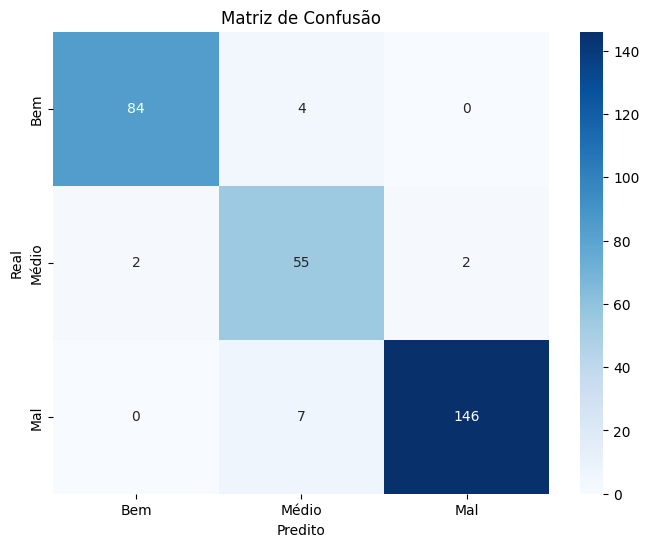

In [53]:
cm = confusion_matrix(y_test, y_pred)  

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Bem', 'Médio', 'Mal'], yticklabels=['Bem', 'Médio', 'Mal'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

## 2.8) Métricas de eficácia

In [54]:
print(f'Melhores Hiperparâmetros Encontrados: {grid_search.best_params_}')

print("----------------------------------------------------------------\n")
classification_rep = classification_report(y_test, y_pred)
print(f'Relatório de Classificação:\n{classification_rep}')

print("----------------------------------------------------------------\n")
accuracy = accuracy_score(y_test, y_pred)  
print(f'Acurácia do teste: {accuracy}')

precision = precision_score(y_test, y_pred, average='weighted')  # Substitua y_test e y_pred pelos seus dados reais e previstos
print(f'Precisão: {precision}')

recall = recall_score(y_test, y_pred, average='weighted')  # Substitua y_test e y_pred pelos seus dados reais e previstos
print(f'Recall: {recall}')

f1 = f1_score(y_test, y_pred, average='weighted')  # Substitua y_test e y_pred pelos seus dados reais e previstos
print(f'Medida F: {f1}')

Melhores Hiperparâmetros Encontrados: {'priors': None, 'var_smoothing': 1e-09}
----------------------------------------------------------------

Relatório de Classificação:
              precision    recall  f1-score   support

         Bom       0.98      0.95      0.97        88
       Medio       0.83      0.93      0.88        59
        Ruim       0.99      0.95      0.97       153

    accuracy                           0.95       300
   macro avg       0.93      0.95      0.94       300
weighted avg       0.95      0.95      0.95       300

----------------------------------------------------------------

Acurácia do teste: 0.95
Precisão: 0.9535086249039739
Recall: 0.95
Medida F: 0.9510358880360485
